In [3]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

In [4]:
# data loading
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']

data = pd.read_csv(url, names=column_names, na_values='?',comment='\t',sep=' ',skipinitialspace=True)

In [6]:
data = data.drop('origin', axis = 1)
print(data.isna().sum())
data = data.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64


In [7]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

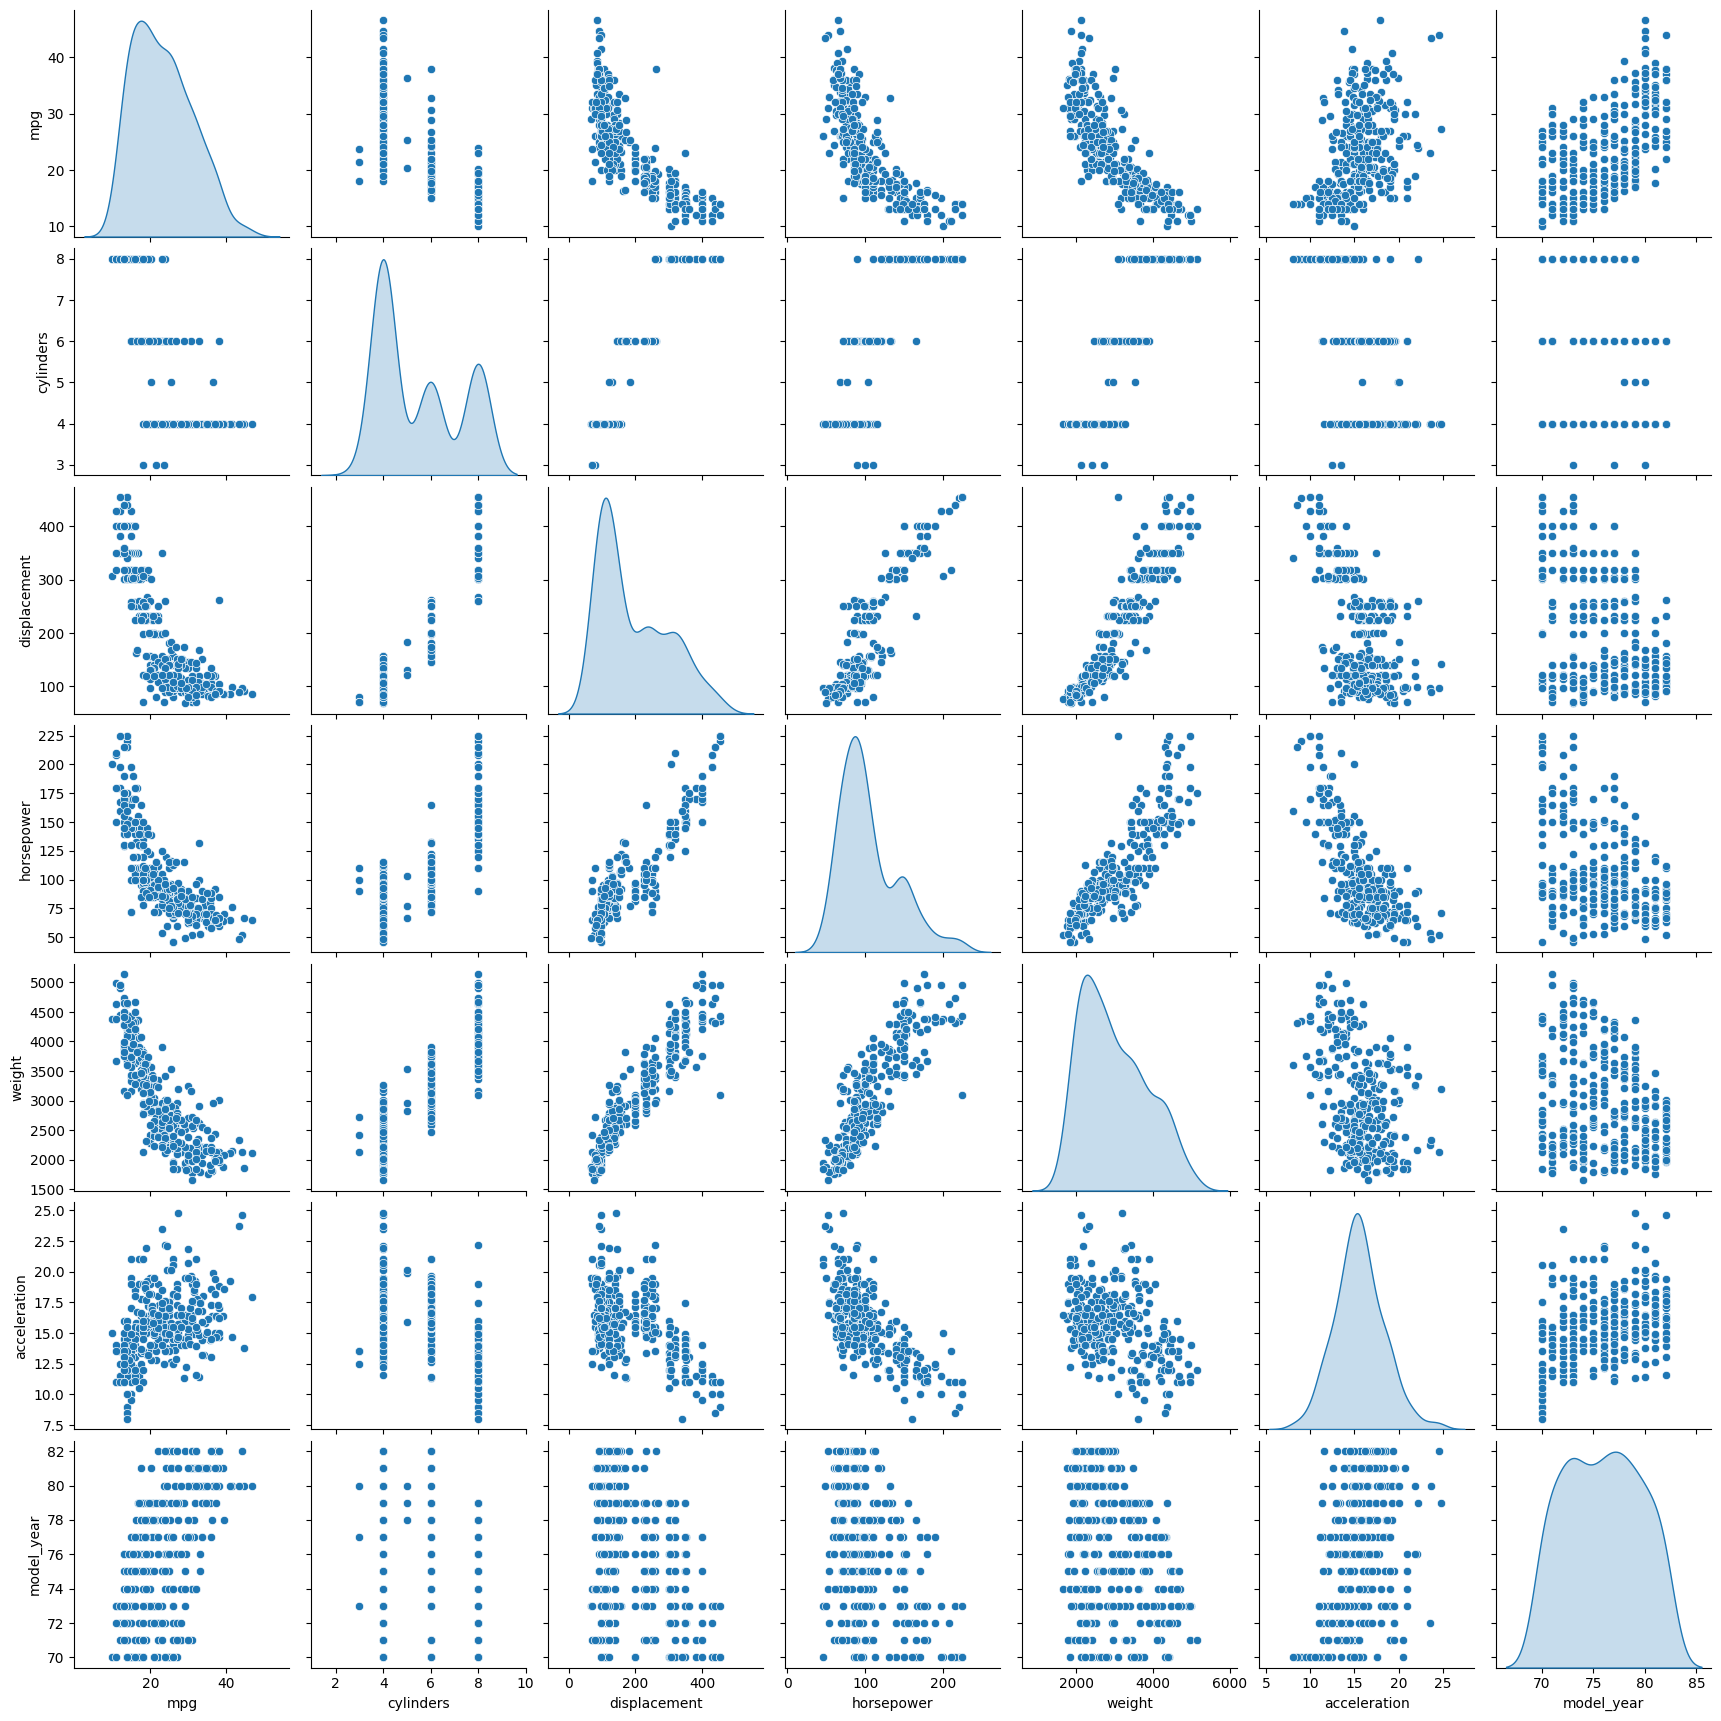

In [8]:
sns.pairplot(train_dataset[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']],
            diag_kind='kde')

In [9]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

In [10]:
# Normalization
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))

In [13]:
# model building  # 2 hidden layers with 64 and 32 neurons 
model = K.Sequential([
    data_normalizer,
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation=None)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 6)               │            13 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (56.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 13 (56.00 B)

In [14]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [15]:
history = model.fit(x=train_features, y = train_labels, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 589.7838 - val_loss: 593.8403
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 587.9633 - val_loss: 569.5368
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 530.0672 - val_loss: 542.5242
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 499.6765 - val_loss: 510.4672
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 478.7915 - val_loss: 472.7124
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 437.3325 - val_loss: 430.1821
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 409.5581 - val_loss: 382.0201
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 379.4101 - val_loss: 330.2625
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 300.0447 - val_loss: 276.8885
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 273.9089 - val_loss: 222.8422
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 200.4453 - val_loss: 172.7197
Epoch 12/100
8/8 ━━━━━━━━━━━━━

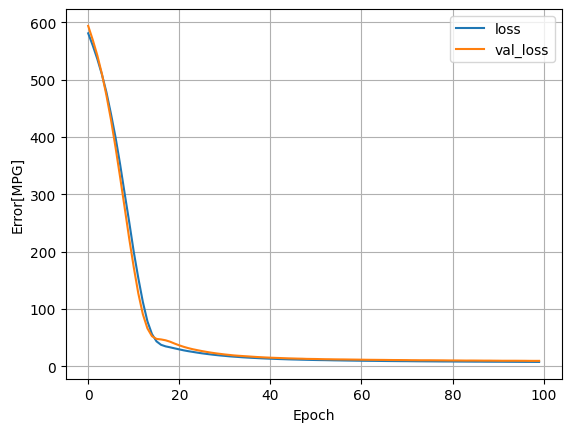

In [16]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error[MPG]')
plt.legend()
plt.grid(True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


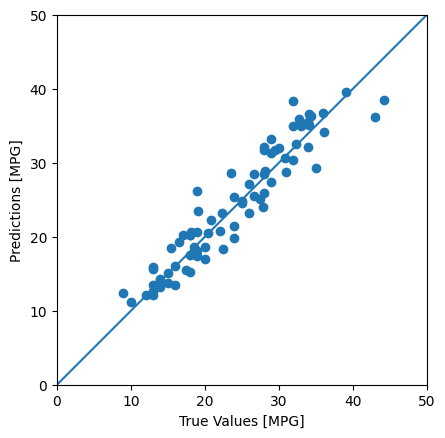

In [17]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Count')

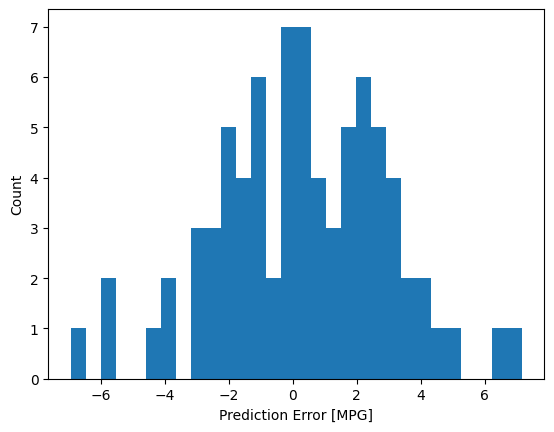

In [18]:
# error between predicted and true fuel efficiency

error = y_pred - test_labels
plt.hist(error, bins = 30)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')